In [1]:
import pandas as pd

filmes = pd.read_csv('movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"] #renomeando as colunas
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioId', "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira tentativa de avaliação

In [5]:
#Quandas vezes cada filme foi votado
total_de_votos = notas["filmeId"].value_counts()
total_de_votos

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: filmeId, Length: 9724, dtype: int64

In [8]:
filmes["total_de_votos"] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [9]:
# Recomendação a filmes mais votados (sem analisar as notas)
filmes.sort_values("total_de_votos", ascending=False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [10]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


# Segunda Abordagem para classificação
    * Nota média + filtragem de votos

In [8]:
# Ao invés de ordenar pelo nmr de votos, ordenar pela nota média
filmes.sort_values("nota_media", ascending=False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [9]:
# Como os filmes que têm a nota média=5 geralmete têm 1 voto apenas, vamos ordenar pelos o nmr de votos >= 10
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [62]:
filmes_mais_50_votos = filmes.query("total_de_votos >= 50")
filmes_mais_50_votos.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


* Mudar o índice com a função set_index ();
* Usar a função loc[] para localizar valores;
* Fazer uma inclusão de coluna;
* Ordernar pela quantidade com a função sort_values(); Deixar a ordenação de maneira decrescente com o parâmetro ascending = False ;
* Agrupar os dados com a função groupby( ); Fazer uma query;

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

# Recomendação baseada em similaridade (o que sabes sobre o usuário)
    * Similaridade com genero
    
    * collaborative filtering X content based filtering
    * filtragem colaborativa X filtragem baseada em conteúdo

In [11]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [12]:
aventura_infantil_fantasia = filmes_mais_50_votos.query("generos == 'Adventure|Animation|Children|Comedy|Fantasy'")
aventura_infantil_fantasia.drop(eu_assisti, errors = 'ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,132.0,3.871212
3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,97.0,3.860825


* Comparar duas tabelas e remover os dados repetidos;
* Utilizar o parâmetro erros=’ignore’ para ignorar qualquer erro na função drop().
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------

# Procurar usuários similares

* João deu nota 4 para Toy Store
* Maria deu nota 5 para Toy Store
* Paulo deu nota 3 para Toy Store
* Joana deu nota 3.5 para Toy Store

    * x-y = distancia 
    * dist entre Joao e Maria = 1

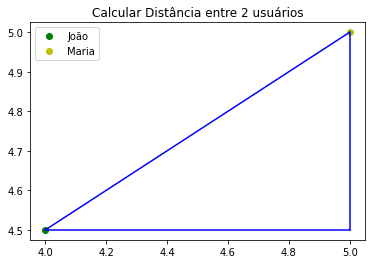

In [13]:
# João = [4, 4,5]
# Maria = [5, 5]

import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go") #go = verde e yo = amarelo
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular Distância entre 2 usuários")
plt.plot([4, 5],[4.5, 4.5], color='b', linestyle="-") # ponto (4, 4.5) ate (5, 4.5)
plt.plot([4, 5],[4.5, 5], color='b', linestyle="-")
plt.plot([5, 5],[4.5, 5], color='b', linestyle="-")

In [11]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [12]:
#pitagoras para calcular a distancia dos 2 
from math import sqrt

def distancia_vetores(a,b):
    return np.linalg.norm(a-b)

In [13]:
distancia_vetores(joao, maria)

1.118033988749895

* Extraindo notas dos usuarios

In [14]:
def notas_usuario(user):
    notas_usuario = notas.query(f"usuarioId == {user}")
    notas_usuario = notas_usuario[["filmeId", "nota"]].set_index("filmeId")
    return notas_usuario

In [15]:
usuario_1 = notas_usuario(1)
usuario_2 = notas_usuario(5)

In [16]:
usuario_1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [17]:
usuario_2.head()

,nota
filmeId,
1,4.0
21,4.0
34,4.0
36,4.0
39,3.0


In [19]:
# OBS.: O join por padrão usa o INDICE, logo, vai juntar os mesmos filmes para não fazermos a comparação com filmes distintos
# lsuffix e rsuffix para sufixo da esquerda e direita respectivamente (quando temos colunas com o mesmo nome)
usuario_1.join(usuario_2, lsuffix="_esquerda", rsuffix="_direita").dropna()

,nota_esquerda,nota_direita
filmeId,,
1,4.0,4.0
50,5.0,4.0
110,4.0,4.0
296,3.0,5.0
316,3.0,2.0
349,4.0,3.0
367,4.0,4.0
457,5.0,4.0
527,5.0,5.0


In [24]:
difrenca = usuario_1.join(usuario_2, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_vetores(difrenca["nota_esquerda"], difrenca["nota_direita"])

3.7416573867739413

In [20]:
def distancia_de_usuarios(usuarioId_1, usuarioId_2):
    notas1 = notas_usuario(usuarioId_1)
    notas2 = notas_usuario(usuarioId_2)
    difrenca = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
    distancia = distancia_vetores(difrenca["nota_esquerda"], difrenca["nota_direita"])
    return [usuarioId_1, usuarioId_2, distancia]

In [21]:
distancia_de_usuarios(1, 5)

[1, 5, 3.7416573867739413]

* Procurar dados similares em relação às características deles;
* Mostrar graficamente a distância entre os dados;
* Legendar e criar uma linha no gráfico;
* Utilizar a função sqrt para gerar a raiz quadrada;
* Criar um array do numpy para fazer a subtração das listas;
* Utilizar a função np_linalg.norm para gerar o valor das distâncias;
* Usar a função join para juntar os dados;
* Utilizar o lsufix e o rsufix para juntar os dados adjacentes;
* Utilizar a função dropna para remover valores nulos.

-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------

# Usuarios mais próximos

In [22]:
#qtd de usuarios
qtd_usuarios = len(notas["usuarioId"].unique())
qtd_usuarios

610

In [23]:
def distancia_de_todos_a_voce(seu_id):
    todos_usuarios = notas['usuarioId'].unique()
    distancias = [distancia_de_usuarios(seu_id, usuario_id) for usuario_id in todos_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
    return distancias

In [24]:
distancia_de_todos_a_voce(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [25]:
distancia_de_todos_a_voce(1).query("distancia == 0")

,voce,outra_pessoa,distancia
0,1,1,0.0
76,1,77,0.0
84,1,85,0.0
174,1,175,0.0
252,1,253,0.0
290,1,291,0.0
305,1,306,0.0
396,1,397,0.0
495,1,496,0.0
505,1,506,0.0


* Obs.: 1 e 77 estão dando distancia = 0 pois o 77 não assistiu nenhum filme do 1 ou então as classificações ficaram identicas
* Por isso é importante dropar as linhas com valores NaN

In [27]:
notas_usuario(1).join(notas_usuario(77), lsuffix = '_1', rsuffix="_77")

,nota_1,nota_77
filmeId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,NaN
50,5.0,NaN
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,NaN


In [28]:
notas_usuario(1).join(notas_usuario(77), lsuffix = '_1', rsuffix="_77").dropna()

,nota_1,nota_77
filmeId,,
260,5.0,5.0
1196,5.0,5.0
1198,5.0,5.0
1210,5.0,5.0
2571,5.0,5.0
3578,5.0,5.0


In [29]:
notas_usuario(1).join(notas_usuario(556), lsuffix = '_1', rsuffix="_556").dropna()

,nota_1,nota_556
filmeId,,


## Usuarios sem filmes em comum vão ser colocados bem distantes um do outro

In [30]:
def distancia_de_usuarios(usuarioId_1, usuarioId_2, minimo = 5):
    notas1 = notas_usuario(usuarioId_1)
    notas2 = notas_usuario(usuarioId_2)
    diferenca = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
    
    if(len(diferenca) < minimo): # caso nmr de filmes em comum seja menor q 5
        return[usuarioId_1, usuarioId_2, 10000]
    
    distancia = distancia_vetores(diferenca["nota_esquerda"], diferenca["nota_direita"])
    return [usuarioId_1, usuarioId_2, distancia]

In [31]:
distancia_de_todos_a_voce(1)

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,10000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
...,...,...,...
605,1,606,11.510864
606,1,607,9.899495
607,1,608,18.241436
608,1,609,3.162278


In [34]:
def mais_proximos_de_voce(seu_id):
    distancias = distancia_de_todos_a_voce(seu_id)
    distancias = distancias.set_index("outra_pessoa")
    distancias_ordenadas = distancias.sort_values("distancia").drop(seu_id)
    return distancias_ordenadas

In [35]:
mais_proximos_de_voce(1)

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
190,1,10000.000000
60,1,10000.000000
576,1,10000.000000


* Utilizar a função unique;
* Utilizar o for de maneira mais curta;
* Fazer uma função para ver quais filmes estão mais próximos da escolha das pessoas;

---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------

# Gerando recomendações com KNN (k vizihos + proximos = k nearest neighbors)

    * Parametros para teste

In [36]:
# Resgatando os mais proximos com um nmr delimitado de usuarios
def distancia_de_todos_a_voce(seu_id, n = None):
    todos_usuarios = notas['usuarioId'].unique()
    if n:
        todos_usuarios = todos_usuarios[:n]
    distancias = [distancia_de_usuarios(seu_id, usuario_id) for usuario_id in todos_usuarios]
    distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
    return distancias

In [37]:
def mais_proximos_de_voce(seu_id, n = None):
    distancias = distancia_de_todos_a_voce(seu_id, n)
    distancias = distancias.set_index("outra_pessoa")
    distancias_ordenadas = distancias.sort_values("distancia").drop(seu_id)
    return distancias_ordenadas

In [38]:
mais_proximos_de_voce(1, n = 5)

,voce,distancia
outra_pessoa,,
5,1,3.741657
3,1,8.200610
4,1,11.135529
2,1,10000.000000


In [39]:
# RETIRANDO AS LINHAS COM VALORES 10000000 PARA MELHOR VISUALIZAÇÃO
def distancia_de_usuarios(usuarioId_1, usuarioId_2, minimo = 5):
    notas1 = notas_usuario(usuarioId_1)
    notas2 = notas_usuario(usuarioId_2)
    diferenca = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
    
    if(len(diferenca) < minimo): # caso nmr de filmes em comum seja menor q 5
        return None
    
    distancia = distancia_vetores(diferenca["nota_esquerda"], diferenca["nota_direita"])
    return [usuarioId_1, usuarioId_2, distancia]

In [40]:
def distancia_de_todos_a_voce(seu_id, n = None):
    todos_usuarios = notas['usuarioId'].unique()
    if n:
        todos_usuarios = todos_usuarios[:n]
    distancias = [distancia_de_usuarios(seu_id, usuario_id) for usuario_id in todos_usuarios]
    distancias = list(filter(None, distancias)) #filter arranca fora os Nones dentro de "distancias"
    distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
    return distancias

In [44]:
# Obs.: Não traz os 50 mais proximos e sim os dentre os 50 primeiros
mais_proximos_de_voce(1, n=8)

,voce,distancia
outra_pessoa,,
5,1,3.741657
8,1,3.741657
7,1,7.106335
3,1,8.200610
6,1,8.602325
4,1,11.135529


In [45]:
voce = 1
notas_de_voce = notas_usuario(voce)
notas_de_voce

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [46]:
def sugere_para_voce(voce, n = None):
    notas_de_voce = notas_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = mais_proximos_de_voce(1, n = n)
    mais_similar = similares.iloc[0].name 

    notas_do_similar = notas_usuario(mais_similar)
    notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors = 'ignore')  # retirando as notas que "voce" já assistiu
    recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

In [47]:
sugere_para_voce(1, 50).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


In [48]:
sugere_para_voce(1).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


## Antes estávamos sugerindo os filmes baseado em uma só pessoa (a mais similar). Agora vamos fazer com mais de um usuário 

In [49]:
def mais_proximos_de_voce(seu_id, n = None, n_mais_proximos = 10):
    distancias = distancia_de_todos_a_voce(seu_id, n)
    distancias = distancias.set_index("outra_pessoa")
    distancias_ordenadas = distancias.sort_values("distancia").drop(seu_id)
    return distancias_ordenadas.head(n_mais_proximos)

In [50]:
mais_proximos_de_voce(1, 300, 2)

,voce,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [51]:
# knn = novo mais_proximos_de_voce
def knn(seu_id, n = None, k_mais_proximos = 10):
    distancias = distancia_de_todos_a_voce(seu_id, n)
    distancias = distancias.set_index("outra_pessoa")
    distancias_ordenadas = distancias.sort_values("distancia").drop(seu_id, errors="ignore")
    return distancias_ordenadas.head(k_mais_proximos)

In [53]:
def sugere_para(voce, n = None, k_mais_proximos = 10):
    notas_de_voce = notas_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = knn(voce, n = n, k_mais_proximos = k_mais_proximos)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']]
    recomendacoes = recomendacoes.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)


In [54]:
sugere_para(1, n = 300).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
802,5.0,Phenomenon (1996),Drama|Romance,46.0,3.336957
534,5.0,Shadowlands (1993),Drama|Romance,14.0,3.607143
1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,34.0,4.161765
515,5.0,"Remains of the Day, The (1993)",Drama|Romance,24.0,3.604167


In [56]:
sugere_para(2, n = 300).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
2010,5.0,Metropolis (1927),Drama|Sci-Fi,21.0,3.857143
1279,5.0,Night on Earth (1991),Comedy|Drama,8.0,4.125000
1243,5.0,Rosencrantz and Guildenstern Are Dead (1990),Comedy|Drama,16.0,3.968750
4014,5.0,Chocolat (2000),Drama|Romance,47.0,3.521277
1251,5.0,8 1/2 (8½) (1963),Drama|Fantasy,14.0,4.071429


* Testar nosso sistema;
* Filtrar as distâncias;
* Analisar um subconjunto;
* Utilizar a função iloc para acessar as linhas;
* Ordenar pela nota de forma crescente com o parâmetro ascending=False;
* Extrair os usuários mais próximos;
* Localizar baseado no índice com set_index(‘usuarioid).loc[usuarios similares]; O que é o knn.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

# Proximos passos

* Testando um usuário novo

In [57]:
filmes.loc[[122904, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54.0,3.833333
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2329,American History X (1998),Crime|Drama,129.0,4.217054
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


In [58]:
def novo_usuario(dados):
    novo_usuario = notas['usuarioId'].max()+1
    notas_usuario_novo = pd.DataFrame(dados, columns = ["filmeId", "nota"])
    notas_usuario_novo["usuarioId"] = novo_usuario
    return pd.concat([notas, notas_usuario_novo])

In [59]:
notas = novo_usuario([[122904, 2], [1246, 5], [2529, 2], [2329, 5], [2324, 5], [1, 2], [7, 5], [2, 2], [1196, 1], [260, 1]])
notas.tail()

,usuarioId,filmeId,nota,momento
5,611,1,2.0,NaN
6,611,7,5.0,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


In [60]:
sugere_para(611).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
134796,5.0,Bitter Lake (2015),Documentary,1.0,5.000000
27803,5.0,"Sea Inside, The (Mar adentro) (2004)",Drama,8.0,4.000000
52328,5.0,Sunshine (2007),Adventure|Drama|Sci-Fi|Thriller,14.0,3.642857
4380,5.0,"Princess and the Warrior, The (Krieger und die...",Drama|Romance,7.0,3.857143
26073,5.0,"Human Condition III, The (Ningen no joken III)...",Drama|War,1.0,5.000000


* Utilizando somente as notas de filmes com mais de 50 votos

In [63]:
notas = notas.set_index("filmeId").loc[filmes_mais_50_votos.index]
notas.head()

,usuarioId,nota,momento
filmeId,,,
1,1,4.0,9.649827e+08
1,5,4.0,8.474350e+08
1,7,4.5,1.106636e+09
1,15,2.5,1.510578e+09
1,17,4.5,1.305696e+09


In [64]:
notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,momento
0,1,1,4.0,9.649827e+08
1,1,5,4.0,8.474350e+08
2,1,7,4.5,1.106636e+09
3,1,15,2.5,1.510578e+09
4,1,17,4.5,1.305696e+09


In [65]:
sugere_para(611).head()

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
74458,4.666667,Shutter Island (2010),Drama|Mystery|Thriller,67.0,4.022388
16,4.666667,Casino (1995),Crime|Drama,82.0,3.926829
8874,4.600000,Shaun of the Dead (2004),Comedy|Horror,77.0,4.006494
1203,4.500000,12 Angry Men (1957),Drama,57.0,4.149123
1090,4.500000,Platoon (1986),Drama|War,63.0,3.984127


* Obs.: Quando trazemos os filmes baseados nos k_mais_proximos, estamos tirando a média das notas desses filmes entre todos os usuários. Porém, se somente um dos usuários assistiu a um filme e deu nota 5, a média dele será 5, por mais que ele não seja um filme "de nicho" na nossa classificação. Nessa situação, esses filmes talvez não sejam exatamente aqueles que gostaríamos de recomendar, já que parece preferível indicarmos um filme de nota 4,5 que foi assistido por dez usuários semelhantes do que um de nota 5 que só foi assistido por um.

:

In [66]:
sugere_para(1, n = 500)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
364,5.0,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,172.0,3.941860
4995,5.0,"Beautiful Mind, A (2001)",Drama|Romance,123.0,4.000000
48780,5.0,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller,90.0,4.005556
7361,5.0,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305
7147,5.0,Big Fish (2003),Drama|Fantasy|Romance,69.0,3.833333
...,...,...,...,...,...
3977,3.0,Charlie's Angels (2000),Action|Comedy,72.0,2.722222
586,3.0,Home Alone (1990),Children|Comedy,116.0,2.995690
1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930


In [67]:
def sugere_para(voce, n = None, k_mais_proximos = 10):
    notas_de_voce = notas_usuario(voce)
    filmes_que_voce_ja_viu = notas_de_voce.index

    similares = knn(1, n = n, k_mais_proximos = k_mais_proximos)
    usuarios_similares = similares.index
    notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']]
    
    #Antes de eu ordenar pela média, vou descartar os filmes com poucos votos entre as 10 pessoas
    aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]
    filtro_minimo = k_mais_proximos / 2
    recomendacoes = recomendacoes.join(aparicoes, lsuffix='_media_dos_usuarios', rsuffix="_aparicoes_nos_usuarios")
    recomendacoes = recomendacoes.query(f"nota_aparicoes_nos_usuarios >= {filtro_minimo}")
    recomendacoes =recomendacoes.drop(filmes_que_voce_ja_viu, errors = 'ignore')
    
    recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)
    return recomendacoes.join(filmes)
    

In [68]:
sugere_para(1, n = 1500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
7153,4.750000,6,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
58559,4.750000,6,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
4993,4.714286,7,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
318,4.583333,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
109487,4.583333,6,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
79132,4.357143,7,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434


In [69]:
sugere_para(600, n = 1500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,
109487,4.583333,6,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
79132,4.357143,7,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434


* Criação de um novo usuário;
* Fazer uma filtragem com base nas quantidade de notas;
* Fazer um recomendador de filmes;
* Pegar os 10 ‘vizinhos’ mais próximos para a recomendação; Implementar o algoritmo KNN;

***********************
***************
**************

### Com base em algoritmos de recomendação como o k-NN, você pode procurar bibliotecas, como a Surprise em Python, que implementam esses algoritmos e podem ser utilizadas de maneira muito mais simples. Quando você for usar esses algoritmos efetivamente em produção, você poderá utilizar o conhecido pipeline de separação de dados para treino, teste do algoritmo e validação do conjunto de dados para verificar o quanto você errou nas avaliações, além de outras opções que essas bibliotecas fornecem.